In [3]:
import pandas as pd
import random
import numpy as np

random_seed = 1998

random.seed(random_seed) # 设置Python全局的random种子
np.random.seed(random_seed)  # 设置numpy的随机种子   

In [4]:
df = pd.read_parquet('data230711.parquet')
df_0 = df[df['landslide'] == 0].sample(97,replace=False) #replace=False时，函数在进行采样时会确保每个元素只被选择一次
df_1 = df[df['landslide'] == 1].sample(97,replace=False)
data = pd.concat([df_0,df_1],axis=0)

# heatmap 相关数据库导入

In [5]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

使用pandas的corr函数计算相关性系数

In [7]:
import pandas as pd


# 计算每列的最小值和最大值
min_values = data.min()
max_values = data.max()

# 进行 Min-Max 归一化
normalized_data = (data - min_values) / (max_values - min_values)
normalized_data


,aspect,dem,faults,landform,landslide,landuse,plan,profile,rainaverage,river,slope,twi
4092029,1.000000,0.000000,1.000000,0.166667,0.0,0.625,0.666667,0.428571,0.613900,1.000000,0.428571,0.285714
11098540,1.000000,0.166667,0.142857,0.000000,0.0,0.375,0.500000,0.428571,0.219595,1.000000,0.000000,0.285714
6918169,0.285714,0.333333,0.857143,0.000000,0.0,0.375,1.000000,0.142857,0.604247,0.285714,0.857143,0.000000
4472055,0.714286,0.000000,1.000000,0.944444,0.0,0.875,0.333333,0.428571,0.659749,0.000000,0.000000,1.000000
633381,0.000000,0.333333,1.000000,0.000000,0.0,0.375,0.833333,0.142857,0.753861,0.142857,0.285714,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
9525032,0.428571,0.500000,0.285714,0.111111,1.0,0.625,0.000000,0.857143,0.546815,0.285714,0.428571,0.571429
7043355,0.571429,0.333333,0.857143,0.111111,1.0,0.625,0.666667,0.428571,0.568533,0.571429,0.285714,0.142857
1318338,0.571429,0.000000,1.000000,0.111111,1.0,0.000,0.500000,0.285714,0.515444,1.000000,0.285714,0.285714
4817144,0.285714,0.000000,1.000000,0.388889,1.0,0.625,0.500000,0.428571,0.657336,0.714286,0.142857,0.285714


In [8]:
corr = normalized_data.corr()

制作热力图

In [94]:
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list('custom_colors', 
    [(235/255,111/255,93/255),
     (113/255,201/255,221/255),
     (51/255,179/255,159/255),
     (99/255,118/255,160/255),
     (245/255,175/255,152/255)], N=200)

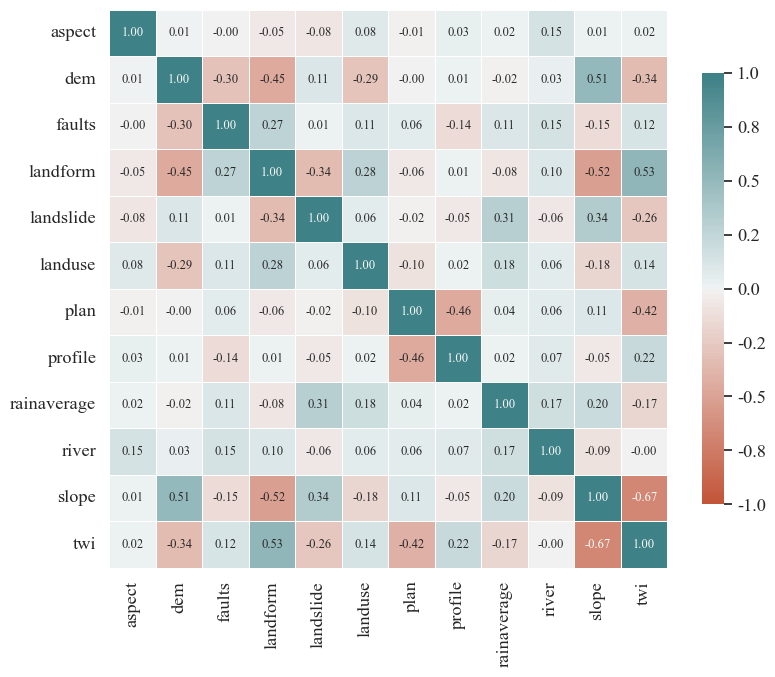

In [10]:
# 设置图形大小 
plt.rcParams['figure.figsize'] = 9,8
plt.rcParams['font.family'] = 'Times New Roman'
# 设置seaborn 全局参数 (使用颜色代码来表示调色板，图形中的文字将以比默认情况下稍大的尺寸显示。)
sns.set(color_codes=True,font_scale=1.2,font = 'Times New Roman')  

#heatmap
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True,annot_kws={'size':9},fmt='.2f',
                 cmap = sns.diverging_palette(20,200,n=200),cbar_kws={'shrink':.7,'format':"%.1f"},
                 linewidths=.5,square=True)
# ax.set_yticklabels(a,size=10)
# ax.xaxis.set_ticks_position("top")
# ax.xaxis.set_ticks_position("none")
# ax.set_xticklabels(a,rotation = 90,size=10)

# 使用heatmapz库制作大小改变的热力图

In [21]:
from heatmap import corrplot
# pip install heatmapz

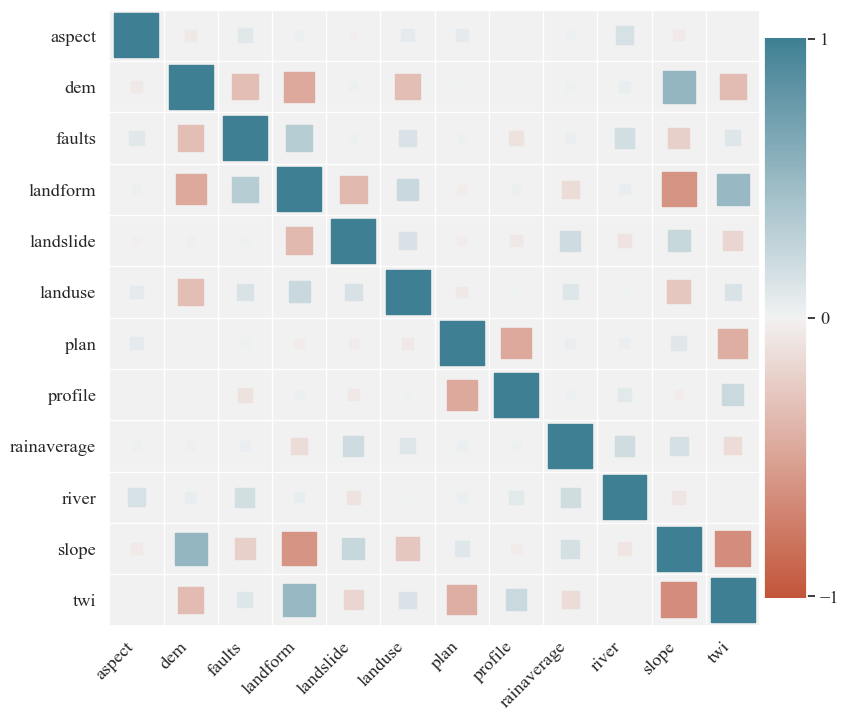

In [169]:
# 设置图形大小 
plt.rcParams['figure.figsize'] = 9,8
plt.rcParams['font.family'] = 'Times New Roman'
# 设置seaborn 全局参数 (使用颜色代码来表示调色板，图形中的文字将以比默认情况下稍大的尺寸显示。)
sns.set(color_codes=True,font_scale=1.2,font = 'Times New Roman')  

corrplot(corr,size_scale=1000)